<a href="https://colab.research.google.com/github/danielselmin/scientific_literature/blob/main/miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=429a5590f93a64ef046a6e246b59bc8bb0ab2818fcb870fc06f8d2d830d3a867
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=1d9fe3518a9566955d76a23c08ba2328525918064b9d72006ae1c2f919db03ad
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9

In [4]:
from google.colab import files
uploaded = files.upload()

Saving GSM3399102_rawCounts.csv.gz to GSM3399102_rawCounts.csv.gz


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# use anaconda/miniconda to ensure packages are right version, otherwise plotting might give error for color

## Load data

In [3]:
adata = sc.read_csv("GSM3399102_rawCounts.csv.gz").T

The raw UMI counts from Cell Ranger was processed by the Seurat R package (version 1.4) (Butler et al., 2018; Macosko et al., 2015). Genes that were detected in less than three cells were removed. Cells in which over 5% of the UMIs were mapped to the mitochondrial genes were discarded, and cells that contained less than 200 or over 4800 genes were considered outliers and discarded. Library-size normalization was performed on the UMI-collapsed gene expression for each barcode by scaling the total number of transcripts per cell to 10,000. The data were then log2 transformed. In total, 9,306 cells and 15,823 genes (an average of 1200 detected genes/cell) were used in the cell type determination.

Linear regression was used to regress out the total number of UMIs and the fraction of mitochondrial transcript content per cell. The variable genes were identified using Seurat’s MeanVarPlot function using the following parameters: x.low.cutoff = 0.0; y.cutoff = 0.8, resulting in 1945 variable genes. These variable genes were used in the principal component analysis. The first 23 principal components were used for cell clustering with a resolution at 0.6, and low dimensional reduction to visualize cell clusters. Specific genes for each cluster were identified using the Seurat’s FindAllMarkers function. To refine clustering, the SubsetData function was used to create a new Seurat object containing only a subset of the original cells and cell clustering was reiterated.



## 1. Quality control

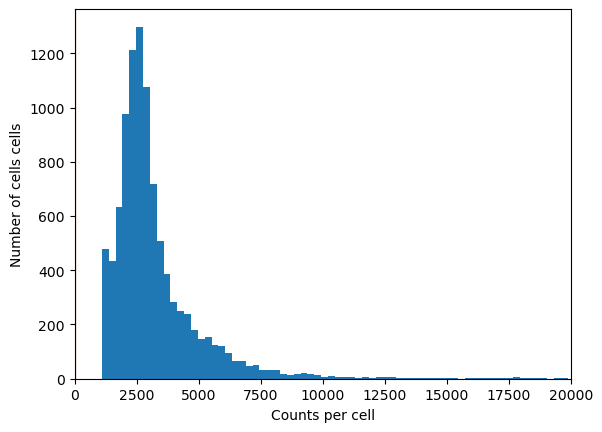

In [4]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
plt.hist(adata.obs['n_counts'], bins=100)
plt.xlabel("Counts per cell") # what are you plotting on the x-axis? Label it!
plt.ylabel("Number of cells cells") # what are you plotting on the x-axis? Label it!
plt.axvline(0, c="r") # specify the lower cutoff value for total UMIs
plt.axvline(0, c="r") # specify the upper cutoff value for total UMIs
plt.xlim(0, 20000)
plt.show()

From the plot, the data is already filtered for UMI counts per cell

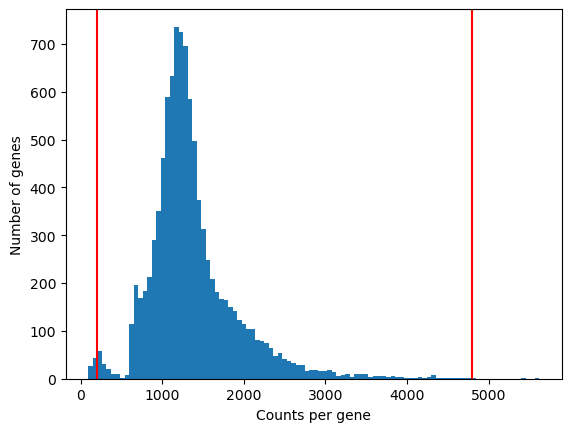

In [5]:
# look at gene counts per gene
expressed_genes = np.sum(adata.X > 0, 1)
adata.obs['n_genes'] = expressed_genes

plt.hist(adata.obs['n_genes'], bins=100)
plt.axvline(200, c="r") # specify the lower cutoff for number of detected genes
plt.axvline(4800, c="r") # specify the upper cutoff for number of detected genes
plt.xlabel("Counts per gene") # what are you plotting on the x-axis? Label it!
plt.ylabel("Number of genes") # what are you plotting on the x-axis? Label it!
plt.show()

c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

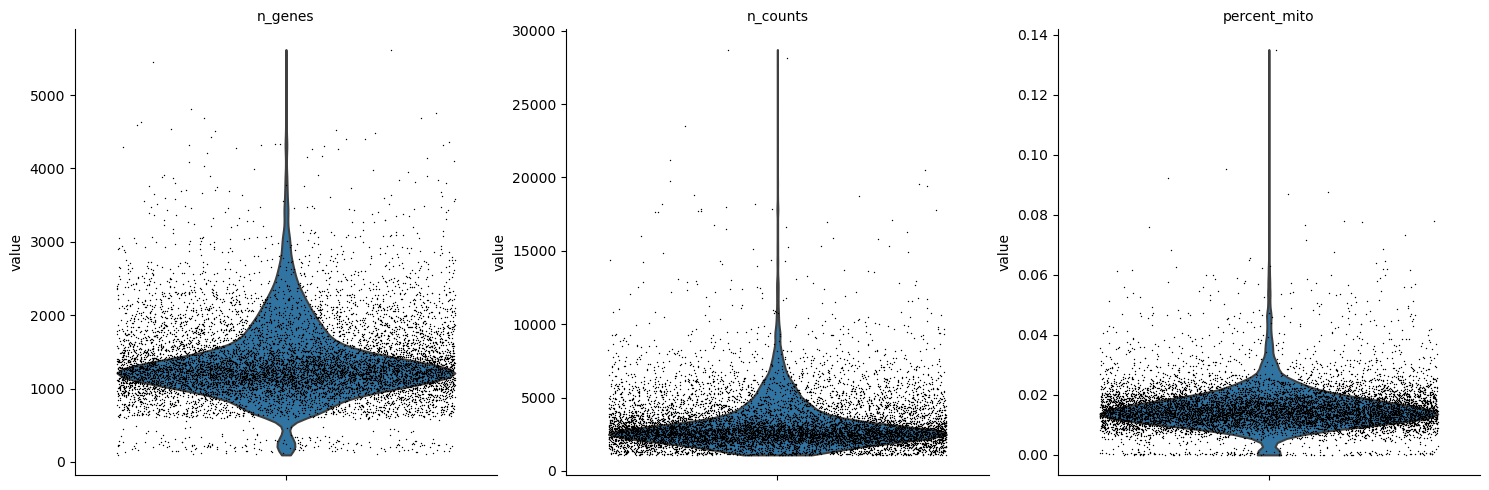

In [6]:
# finally check percentage of mitochondrial genes
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True)

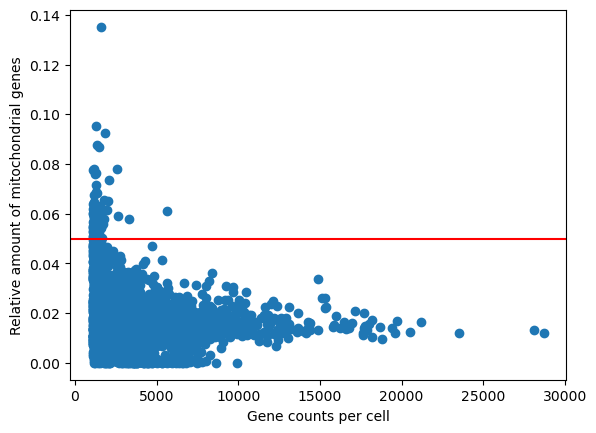

In [7]:
plt.scatter(adata.obs["n_counts"], adata.obs["percent_mito"])
plt.xlabel("Gene counts per cell") # specify the lower cutoff for number of detected genes
plt.ylabel("Relative amount of mitochondrial genes") # specify the lower cutoff for number of detected genes
plt.axhline(0.05, c='red') # specify a threshold (decimal from 0 to 1) for percentage mitochondrial reads
plt.show()

## 1.1 filter the data
Based on the above plots, we suggest to cut-off data for higher than 0.04 mitochondrial percentage,and to keep data within 500 and 3500 counts per gene and 1000to 10,000 gene counts per cell.
To improve, set boundaries with some algorithm based on the distributions?

In [8]:
# sc.pp.filter_cells(adata, min_counts=200) # apply threshold from above to actually do the filtering
# sc.pp.filter_cells(adata, max_counts=4800) # apply threshold from above to actually do the filtering
sc.pp.filter_cells(adata, min_genes=200) # apply threshold from above to actually do the filtering
sc.pp.filter_cells(adata, max_genes=4800) # apply threshold from above to actually do the filtering
adata = adata[adata.obs['percent_mito'] < 0.05, :].copy() # apply threshold from above to actually do the filtering

In [9]:
# filter genes expressed in less than 3 ells
sc.pp.filter_genes(adata, min_cells=3)

## 2. Normalization
Address variability caused by sc sequencing process

In [10]:
adata.raw = adata.copy()
adata_raw = adata.copy()

In [11]:
sc.pp.normalize_total(adata, target_sum=10000)
sc.pp.log1p(adata)

## 3. Feature selection

In [12]:
# Get cell states (S, G2m vs G1, G0)
S_genes_mouse = ['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung',
       'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Cenpu',
       'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76',
       'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2',
       'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8ap2',
       'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']
G2M_genes_mouse = ['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a',
       'Ndc80', 'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf',
       'Tacc3', 'Pimreg', 'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb',
       'Bub1', 'Kif11', 'Anp32e', 'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp',
       'Cdca3', 'Jpt1', 'Cdc20', 'Ttk', 'Cdc25c', 'Kif2c', 'Rangap1',
       'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8', 'Ect2', 'Kif23', 'Hmmr',
       'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5', 'Cenpe', 'Ctcf', 'Nek2',
       'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']

sc.tl.score_genes_cell_cycle(adata, s_genes=S_genes_mouse, g2m_genes=G2M_genes_mouse)

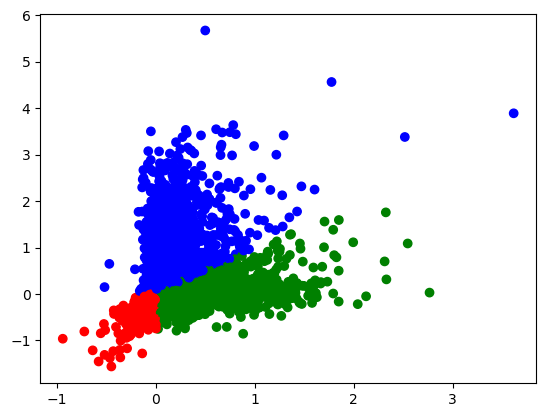

In [13]:
n2c = {"G1":"red", "S":"green", "G2M":"blue"} # use to assign each cell a color based on phase in the scatter plot
colors = []
for phase in adata.obs['phase']:
    colors.append(n2c[phase])

plt.scatter(adata.obs['S_score'], adata.obs['G2M_score'], c=colors)
plt.show()

In [14]:
adata.obs["phase"].value_counts()

phase
G1     6707
S      1898
G2M    1103
Name: count, dtype: int64

In [15]:
# Linear regression was used to regress out the total number of UMIs and the fraction of mitochondrial transcript content per cell. 
sc.pp.regress_out(adata, ['n_counts', 'percent_mito']) #, 'S_score', 'G2M_score']) # specify which feature from adata.obs you want to regress out, if any

Select 1945 highest variance components, as the authors wrote:
The variable genes were identified using Seurat’s MeanVarPlot function using the following parameters: x.low.cutoff = 0.0; y.cutoff = 0.8, resulting in 1945 variable genes. 

In [16]:
sc.pp.highly_variable_genes(adata, n_top_genes=1945, min_disp=0.5, 
                            max_disp=np.inf, min_mean=0.0125, max_mean=3, span=0.3)

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [17]:
adata = adata[:, adata.var["highly_variable"]].copy() # actually do the filtering

In [18]:
adata

AnnData object with n_obs × n_vars = 9708 × 1945
    obs: 'n_counts', 'n_genes', 'percent_mito', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

## 4. Principal component analysis

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


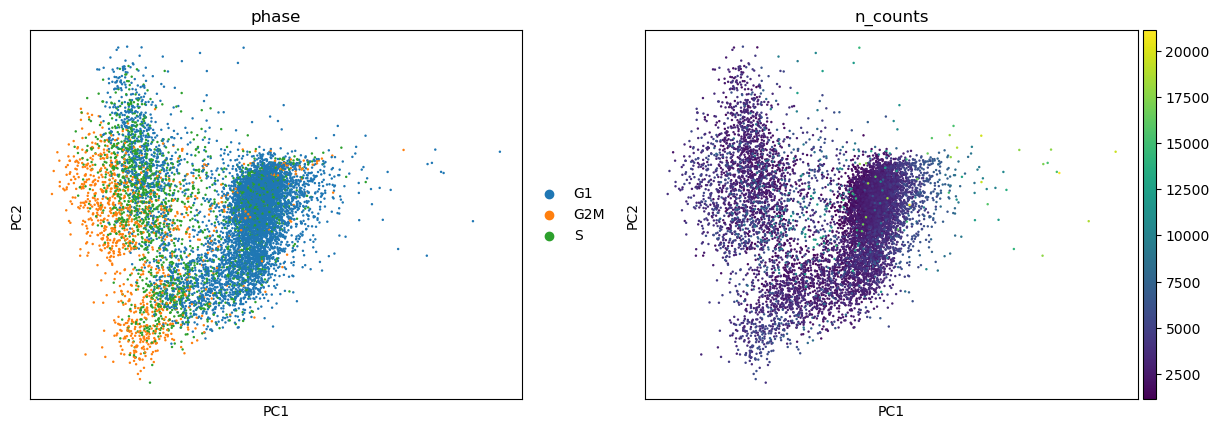

In [20]:
sc.pl.pca(adata, color=['phase','n_counts'])

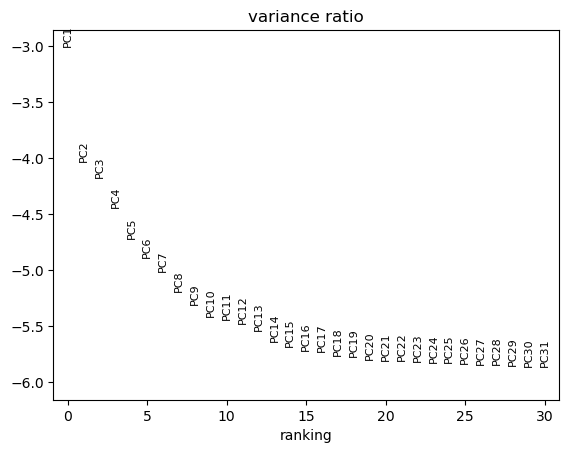

In [21]:
sc.pl.pca_variance_ratio(adata, log=True) # see contribution of each PC to variance

## 5. Dimensionality reduction 

In [22]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=23) # specify the number of neighbors and number of PCs you wish to use

c:\Users\jurri\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
sc.tl.tsne(adata, random_state=0)

c:\Users\jurri\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jurri\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [24]:
sc.tl.umap(adata, alpha=0.3, min_dist=0.5, random_state=0)

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


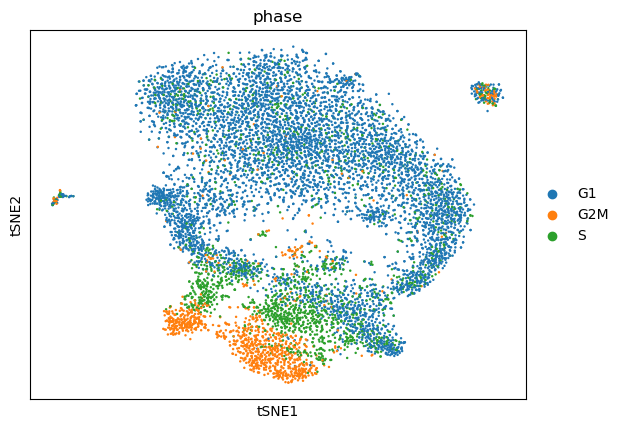

In [25]:
# visualize the tSNE colored by phase
sc.pl.tsne(adata, color='phase', use_raw=False, wspace=0.3, ncols=3)

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


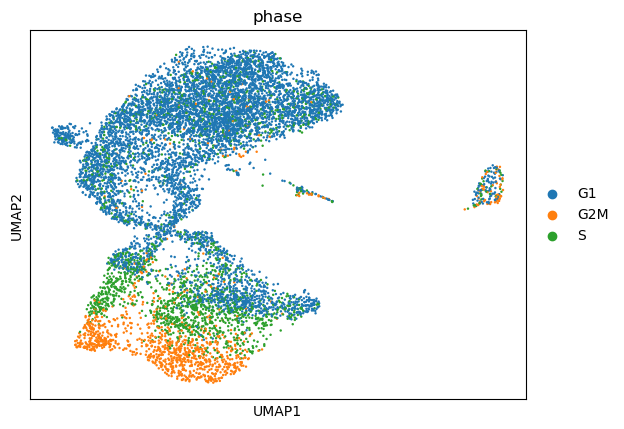

In [26]:
# visualize the UMAP colored by phase
sc.pl.umap(adata, color='phase', use_raw=False, wspace=0.3, ncols=3)

## 6. Clustering

In [56]:
resolution = 1.5
sc.tl.leiden(adata, resolution=resolution)

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


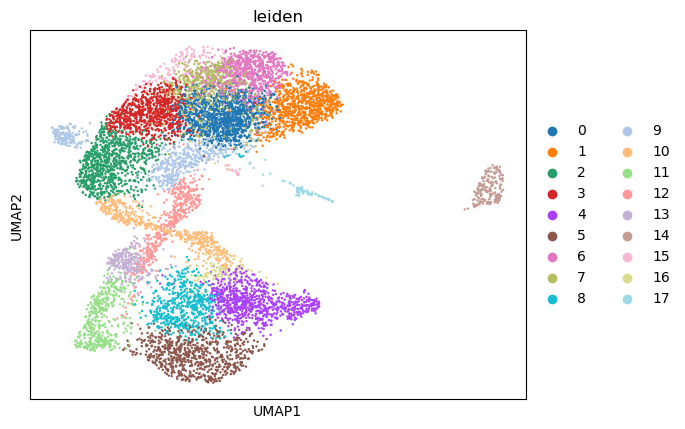

In [57]:
sc.pl.umap(adata, color=['leiden'], use_raw=False, wspace=0.3, ncols=2)

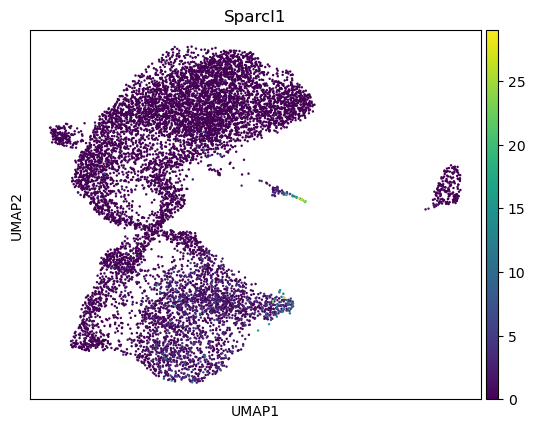

In [55]:
sc.pl.umap(adata, color="Sparcl1")
#	0	NPC(Hes5)	Gabaergic (Lhx5, GAD1)	Purkinje (Rora and Foxp2)	glutamatergic (Atoh1 Barhl1 and 	GNPs/Granule neurons	6	7	8	Non-neuronal	10


c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


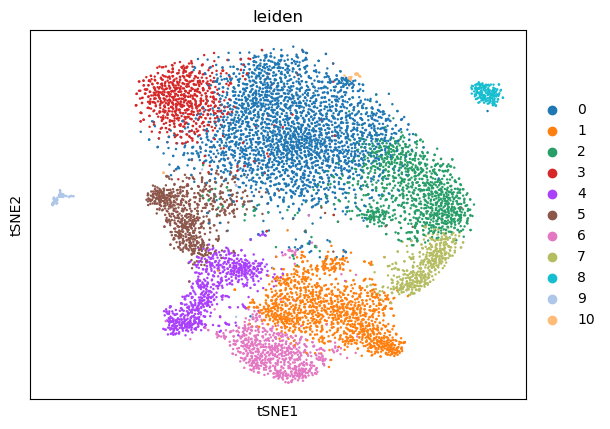

In [34]:
# color by louvain and leiden

## 7. Identifying marker genes and cell types
Before proceeding with marker gene analysis and cell type annotation, restore the raw version of the data, add the necessary annotations, and normalize the counts:

In [58]:
adata_raw_norm = adata_raw.copy()

# normalize the counts
sc.pp.normalize_total(adata_raw_norm)
# log transform the counts
sc.pp.log1p(adata_raw_norm)
# transfer over the metadata
adata_raw_norm.obsm["X_umap"] = adata.obsm["X_umap"]
adata_raw_norm.obs["leiden"] = [i for i in adata.obs["leiden"]]

In [59]:
sc.tl.rank_genes_groups(adata_raw_norm, 'leiden', use_raw=False, method="t-test")

In [61]:
marker_genes = pd.DataFrame(adata_raw_norm.uns["rank_genes_groups"]["names"])
marker_genes.iloc[:100].to_csv("most_variable_2.csv")

In [42]:
sc.get.rank_genes_groups_df(adata_raw_norm, group='1')[:]


names     scores  logfoldchanges  pvals  pvals_adj
0         Fabp7  87.221031        4.147031    0.0        0.0
1           Dbi  54.113754        2.674676    0.0        0.0
2           Vim  51.857372        2.475517    0.0        0.0
3           Id3  50.415325        3.584327    0.0        0.0
4      Serpinh1  48.701141        3.059873    0.0        0.0
...         ...        ...             ...    ...        ...
15798     Stmn3 -56.537868       -2.358264    0.0        0.0
15799    Tuba1a -57.376308       -1.225646    0.0        0.0
15800    Tmsb10 -59.331665       -1.212532    0.0        0.0
15801       Ina -59.988602       -2.847436    0.0        0.0
15802     Tubb3 -66.589111       -2.573529    0.0        0.0

[15803 rows x 5 columns]

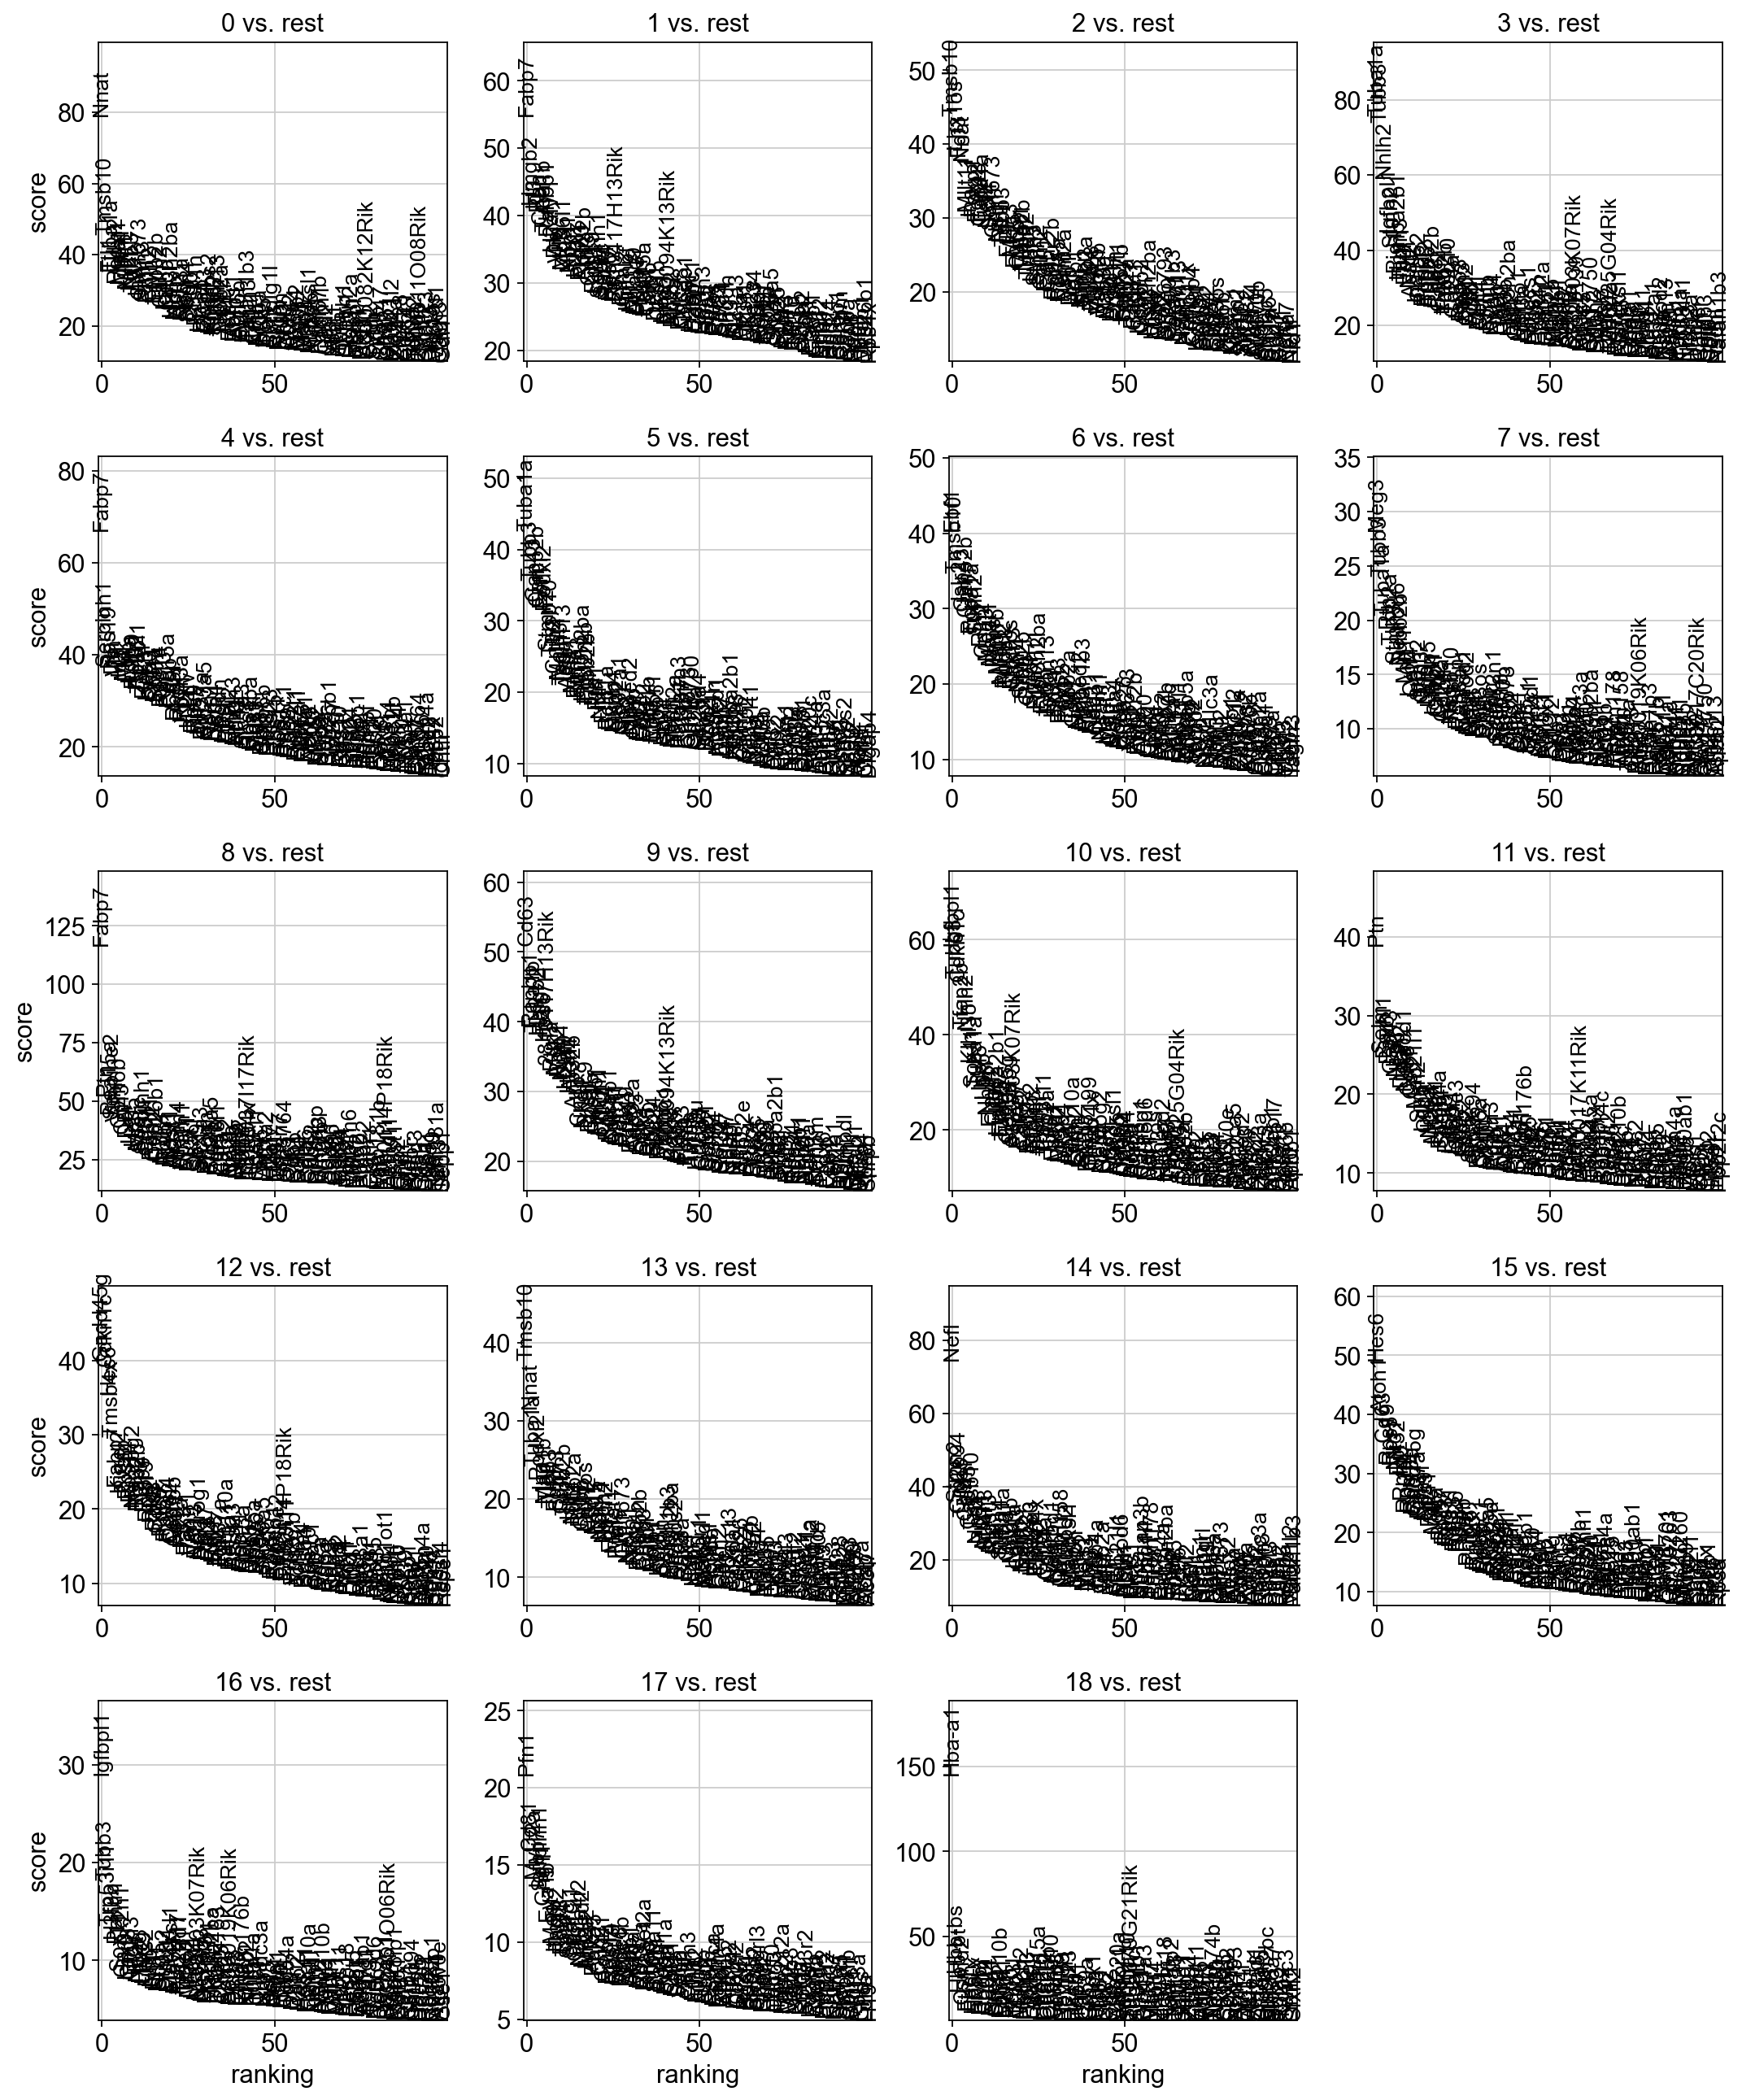

In [200]:
sc.pl.rank_genes_groups(adata_raw_norm, n_genes=100, sharey=False, fontsize=12)


c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jurri\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

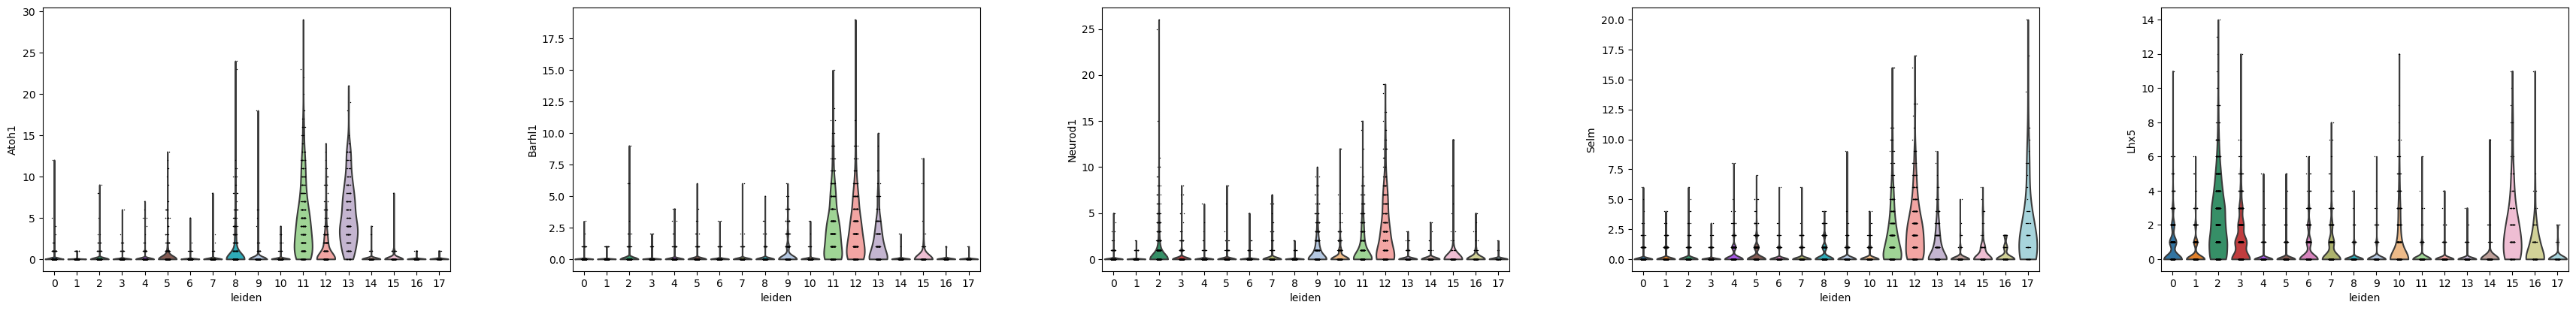

In [97]:
sc.pl.violin(adata_raw_norm, ["Atoh1", "Barhl1", "Neurod1", "Selm", "Lhx5"], groupby='leiden', 
              cmap=None, dendrogram=False)

In [114]:
cluster2type_dict = {
    "0": "Gabaergic", # Gad2
    "1": "Gabaergic",   # Gad2, Lhx5, Foxp2
    "2": "Gabaergic",
    "3": "Gabaergic", 
    "4": "Astrocytes and microglia", # (Sparc and Sox9) Sparcl1
    "5": "Granule neurons", # (Neurod1, Selm)
    "6": "Gabaergic",
    "7": "Gabaergic", # Gad2
    "8": "NPC", # Id3, Id1
    "9": "Granule neurons", # Neurod1, Selm
    "10": "Purkinje",   # Pvalb
    "11": "Granule neurons", # Selm, pax6, atoh1, neurod
    "12": "Granule neurons", # Selm, pax6, atoh1, neurod
    "13": "Glutamergic", # Atoh1, Barhl1
    "14": "Other",
    "15": "Gabaergic",
    "16": "Astrocytes and microglia", # Sparcl1 and Slc1a3, Id3, Ndrg2
    "17": "Erythrocytes", #  Bambi
}

In [115]:
adata.obs["cell_type"] = np.array([cluster2type_dict[i] for i in adata.obs["leiden"]])

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


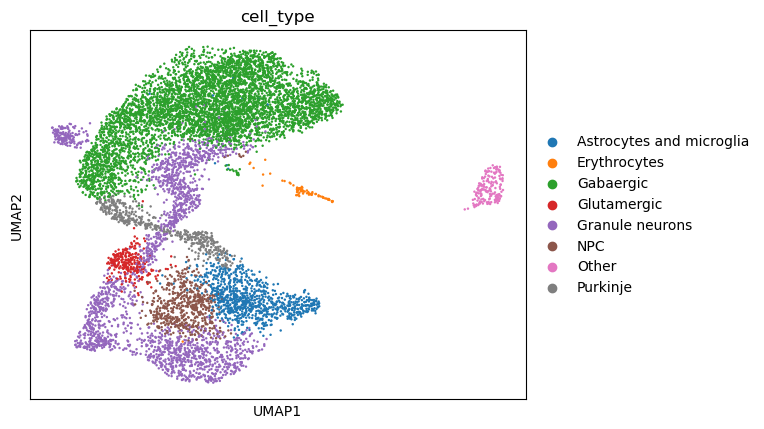

In [117]:
sc.pl.umap(adata, color=['cell_type'], use_raw=False, wspace=0.3, ncols=2)

## 8. Astrocytes trajectory inference method 1

c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\tools\_paga.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[groups + '_sizes'] = np.array(paga.ns)


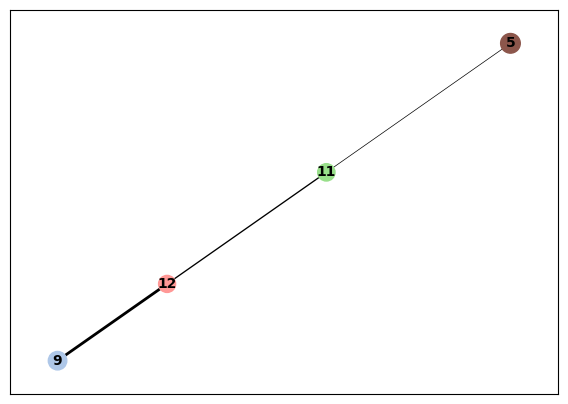

In [127]:
astrocytes = adata[adata.obs["cell_type"] == "Granule neurons", :]
sc.tl.paga(astrocytes, groups='leiden')
sc.pl.paga(astrocytes, color="leiden")

In [226]:
# select gene markers
cell_type = "Gabaergic"
selection = np.ones(len(adata), dtype=bool)
for gene, threshold in zip(cell_type_markers[cell_type][0], cell_type_markers[cell_type][1]):
    selection = np.logical_and(selection, adata.obs_vector(gene) > threshold)
selected_cells = adata[selection]

In [234]:
selected_cells = astrocytes

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [239]:
set(selected_cells.obs["leiden"])

{'1', '10', '12', '15', '17', '4', '6', '8'}

In [228]:
sc.tl.diffmap(selected_cells)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          0.8527873   0.6651627   0.54562294  0.5155464   0.4827928
      0.47448236  0.46649852 -0.46476564 -0.4685385  -0.47226474 -0.47866437
     -0.49536324 -0.5481721  -0.7218745 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [229]:
sc.tl.dpt(selected_cells, n_branchings=1, n_dcs=10)

    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Pseudotime using n_dcs=10
    finished: added

    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\jurri\miniconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\jurri\miniconda3\Lib\site-packages

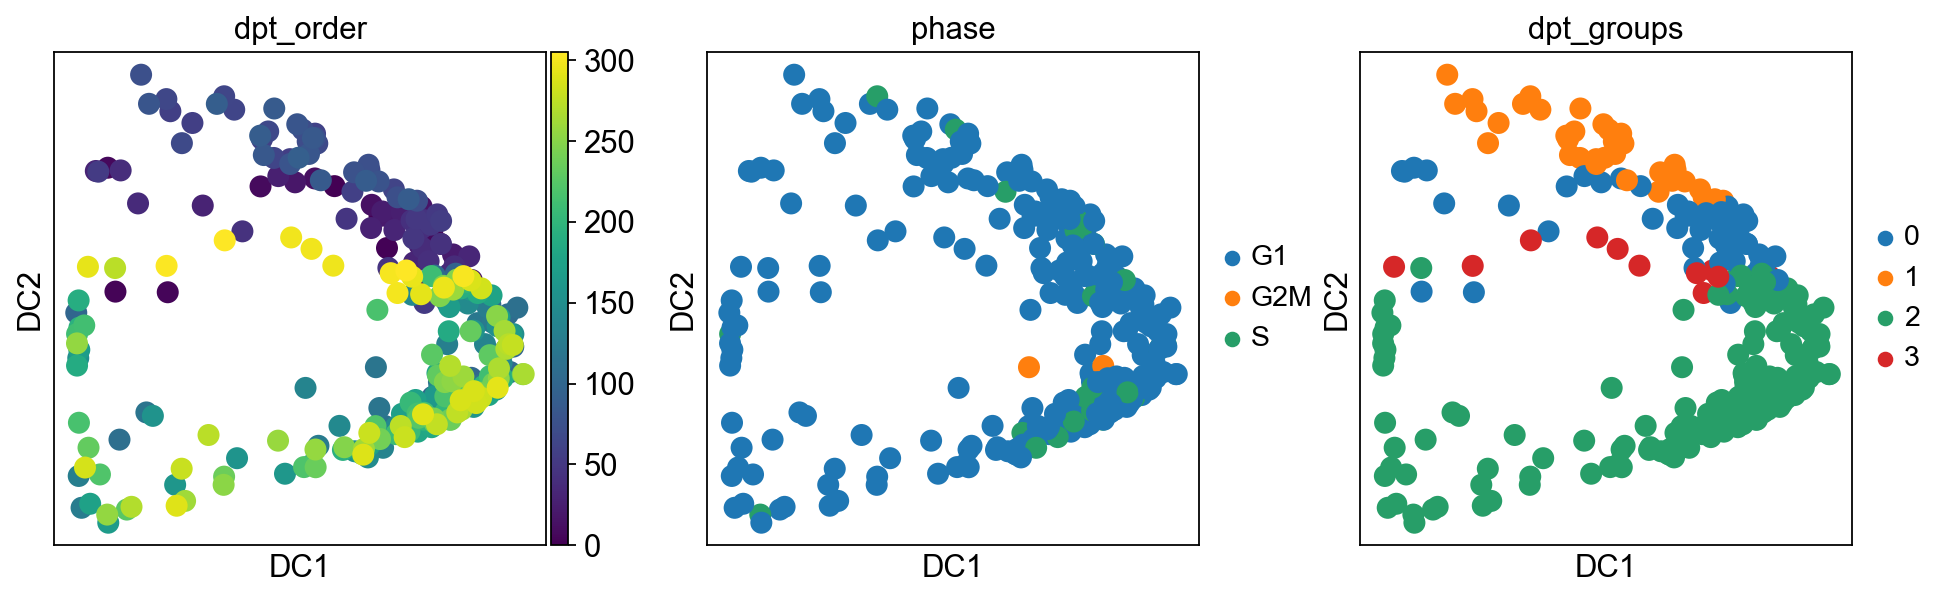

In [230]:
sc.pl.diffmap(selected_cells, color=['dpt_order', 'phase', 'dpt_groups'])

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.96516585 0.9533408  0.93292207 0.919589   0.90922403
     0.8911426  0.88814217 0.8715356  0.86110914 0.8435301  0.8322137
     0.8171911  0.7789197  0.77078825]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X
computing Diffusion Pseudotime using n_dcs=10
    finished: added

    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)

KeyError: 'dpt_order'

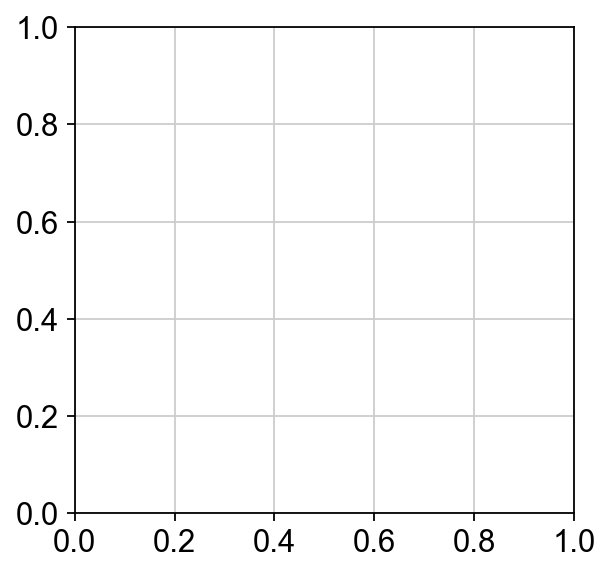

In [245]:
sc.tl.diffmap(astrocytes)
sc.pp.neighbors(astrocytes, use_rep="X_diffmap")
sc.tl.dpt(astrocytes, n_branchings=1, n_dcs=10)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


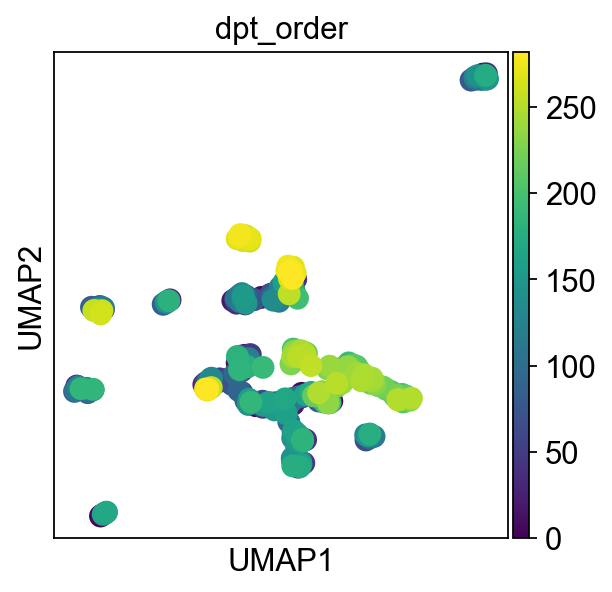

## 8. Astrocytes trajectory inference method 2

In [ ]:
gene_threshold = 0.80
gene_marker = "SLC1A3"
astrocytes = adata[adata.obs_vector(gene_marker) > slc1a3_threshold, :]

In [ ]:
sc.pp.recipe_zheng17(astrocytes)

In [ ]:
sc.tl.pca(astrocytes, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(astrocytes, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(astrocytes)

In [ ]:
c.pl.draw_graph(astrocytes, color='paul15_clusters', legend_loc='on data')

## 8. Astrocytes trajectory inference method 3

In [ ]:
gene_threshold = 0.80
gene_marker = "SLC1A3"
astrocytes = adata[adata.obs_vector(gene_marker) > slc1a3_threshold, :]

In [ ]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [ ]:
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

In [ ]:
sc.pp.neighbors(astrocytes, n_neighbors=5, method='gauss', knn=False)

In [ ]:
sc.tl.diffmap(astrocytes)

In [ ]:
sc.tl.dpt(astrocytes, n_branchings=1, n_dcs=10)

In [ ]:
sc.pl.diffmap(astrocytes, color=['dpt_pseudotime', 'dpt_groups', 'exp_groups'])